In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
plt.rcParams["font.family"] = "serif"

In [2]:
#Initial data
tau1_gen = np.reshape(np.load("data/tau1s_Pythia_gen.npy"), (-1,1))
tau2_gen = np.reshape(np.load("data/tau2s_Pythia_gen.npy"), (-1,1))

In [3]:
#INN
pythia_inn = np.load("density-based/inn_pythia.npy")
herwig_inn = np.load("density-based/inn_herwig.npy")

In [4]:
print(np.shape(pythia_inn))
print(np.shape(herwig_inn))

(10, 500000, 2)
(10, 500000, 2)


In [5]:
#OmniFold
pythia_omni = np.load("classifier-based/weights_pythia.npy")
herwig_omni = np.load("classifier-based/weights_herwig.npy")

# import data
tau1_gen = np.reshape(np.load("data/tau1s_Pythia_gen.npy"), (-1,1))
tau2_gen = np.reshape(np.load("data/tau2s_Pythia_gen.npy"), (-1,1))

tau1_sim = np.reshape(np.load("data/tau1s_Pythia_sim.npy"), (-1,1))
tau2_sim = np.reshape(np.load("data/tau2s_Pythia_sim.npy"), (-1,1))

tau1_gen_herwig = np.reshape(np.load("data/tau1s_Herwig_gen.npy"), (-1,1))
tau2_gen_herwig = np.reshape(np.load("data/tau2s_Herwig_gen.npy"), (-1,1))

tau1_sim_herwig = np.reshape(np.load("data/tau1s_Herwig_sim.npy"), (-1,1))
tau2_sim_herwig = np.reshape(np.load("data/tau2s_Herwig_sim.npy"), (-1,1))

train_gen, test_gen = np.split(np.concatenate([tau1_gen,tau2_gen], axis=-1), 2)
train_sim, test_sim = np.split(np.concatenate([tau1_sim,tau2_sim], axis=-1), 2)

train_gen_herwig, test_gen_herwig = np.split(np.concatenate([tau1_gen_herwig,tau2_gen_herwig], axis=-1), 2)
train_sim_herwig, test_sim_herwig = np.split(np.concatenate([tau1_sim_herwig,tau2_sim_herwig], axis=-1), 2)

In [6]:
tau1_inn = pythia_inn[0:10,:,0].flatten()
tau2_inn = pythia_inn[0:10,:,1].flatten()

tau1_inn_herwig = herwig_inn[0:10,:,0].flatten()
tau2_inn_herwig = herwig_inn[0:10,:,1].flatten()

<ipython-input-9-2b63d8acc861>:14: RuntimeWarning: invalid value encountered in true_divide
  truth,_,_=plt.hist(tau2_gen[0:500000]/tau1_gen[0:500000],weights=ps*np.ones(500000),color="black",bins=bins,histtype="step",label="Truth",lw=3)
<ipython-input-9-2b63d8acc861>:17: RuntimeWarning: invalid value encountered in true_divide
  omni,_=np.histogram(train_gen[:,1]/train_gen[:,0],bins=np.linspace(0,1.3,20),weights=ps*pythia_omni[-1,1,:])
<ipython-input-9-2b63d8acc861>:18: RuntimeWarning: invalid value encountered in true_divide
  omni_herwig,_=np.histogram(train_gen_herwig[:,1]/train_gen_herwig[:,0],bins=bins,weights=ps*herwig_omni[-1,1,:])


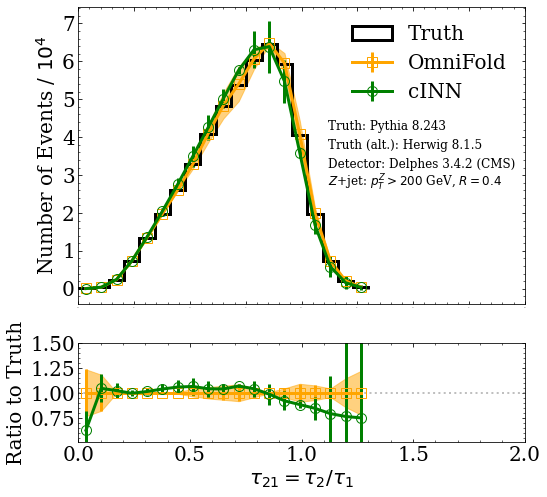

In [9]:
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=0)
plt.yticks(fontsize=20)
ax0.minorticks_on()

bins=np.linspace(0,1.3,20)
ps = 0.0001

truth,_,_=plt.hist(tau2_gen[0:500000]/tau1_gen[0:500000],weights=ps*np.ones(500000),color="black",bins=bins,histtype="step",label="Truth",lw=3)
inn,b=np.histogram(tau2_inn/tau1_inn,bins=bins,weights=ps*0.1*np.ones(len(tau2_inn)))
inn_herwig,_=np.histogram(tau2_inn_herwig/tau1_inn_herwig,bins=bins,weights=ps*0.1*np.ones(len(tau2_inn_herwig)))
omni,_=np.histogram(train_gen[:,1]/train_gen[:,0],bins=np.linspace(0,1.3,20),weights=ps*pythia_omni[-1,1,:])
omni_herwig,_=np.histogram(train_gen_herwig[:,1]/train_gen_herwig[:,0],bins=bins,weights=ps*herwig_omni[-1,1,:])
plt.fill_between(0.5*(b[1:]+b[:-1]),omni-abs(omni-omni_herwig),omni+abs(omni-omni_herwig),color="orange",alpha=0.5)
plt.errorbar(0.5*(b[1:]+b[:-1]),omni,color="orange",marker='s',yerr=0,fillstyle="none",label="OmniFold",markersize=10,lw=3)
plt.errorbar(0.5*(b[1:]+b[:-1]),inn,yerr=abs(inn-inn_herwig),color="green",marker='o',fillstyle="none",label="cINN",markersize=10,lw=3)


plt.xlabel("")
plt.ylabel("Number of Events / $10^4$",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.xlim([0,2])
plt.text(1.12,4.5-0.3,"Truth: Pythia 8.243",fontsize=12)
plt.text(1.12,4.0-0.3,"Truth (alt.): Herwig 8.1.5",fontsize=12)
plt.text(1.12,3.5-0.3,"Detector: Delphes 3.4.2 (CMS)",fontsize=12)
plt.text(1.12,3.0-0.3,r"$Z$+jet: $p_T^{Z}>200$ GeV, $R=0.4$",fontsize=12)

ax1 = plt.subplot(gs[1])
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(direction="in",which="both")
ax1.minorticks_on()
plt.ylim([0.51,1.5])
plt.xlim([0,2])
plt.locator_params(axis='x', nbins=6)
plt.xlabel(r"$\tau_{21}=\tau_2/\tau_1$",fontsize=20)
plt.ylabel("Ratio to Truth",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axhline(y=1,linewidth=2, color='gray',ls=":",alpha=0.5)   
plt.fill_between(0.5*(b[1:]+b[:-1]),omni/truth-abs(omni-omni_herwig)/truth,omni/truth+abs(omni-omni_herwig)/truth,color="orange",alpha=0.5)
plt.errorbar(0.5*(b[1:]+b[:-1]),omni/truth,yerr=abs(omni-omni_herwig)/truth,color="orange",fillstyle="none",marker='s',markersize=10,lw=3)
plt.errorbar(0.5*(b[1:]+b[:-1]),inn/truth,yerr=abs(inn-inn_herwig)/truth,color="green",marker='o',fillstyle="none",markersize=10,lw=3)

plt.savefig("tau21.pdf",bbox_inches='tight')